<a href="https://colab.research.google.com/github/kajok88/Intro2AI/blob/main/teht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

[[   8.34   40.77 1010.84   90.01  480.48]
 [  23.64   58.49 1011.4    74.2   445.75]
 [  29.74   56.9  1007.15   41.91  438.76]
 [  19.07   49.69 1007.22   76.79  453.09]
 [  11.8    40.66 1017.13   97.2   464.43]]
[480.48 445.75 438.76 453.09 464.43]
Coefficients and scaled coordinates: 
Ans w= 
[-14.73659333  -2.97242952   0.36867791  -2.30751179]
454.36500940635386


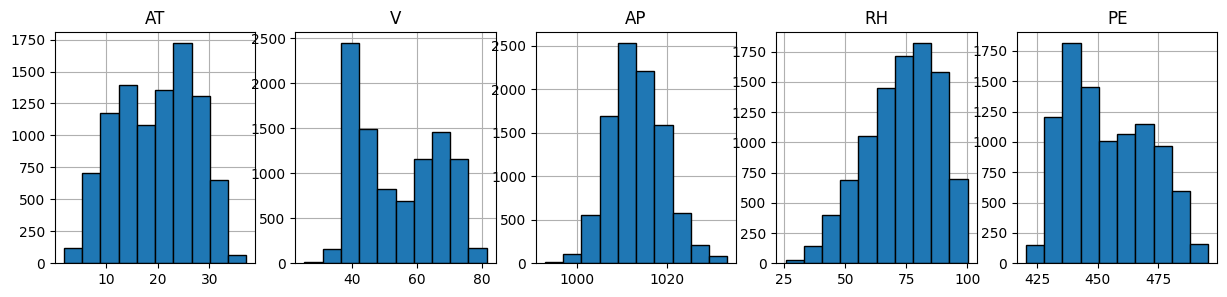

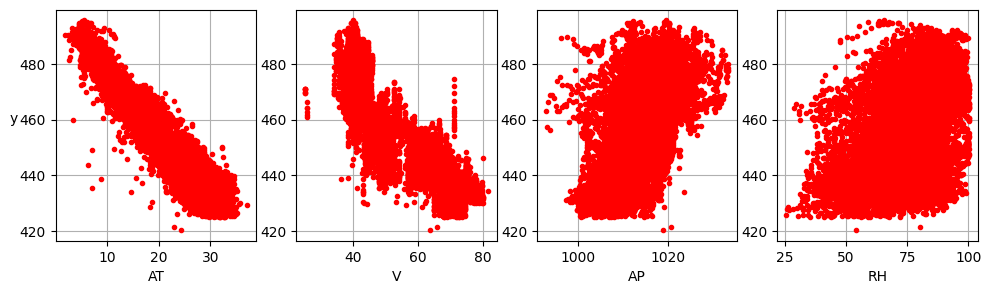

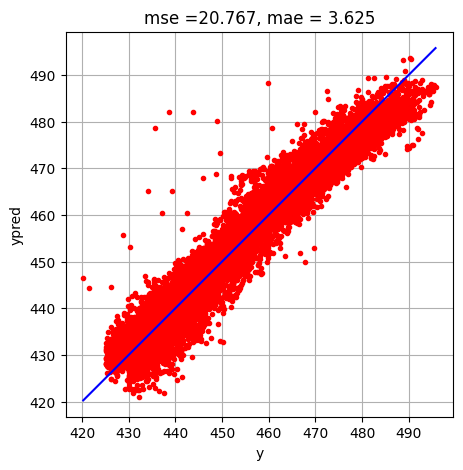

In [ ]:
#-----------------------
#-- Linear regression --
#-----------------------

# Teht. 1

# Read the headers
with open('Folds5x2_pp.csv', 'r') as f:
    headers = f.readline().strip().split(',')
#read the dataset into a matrix data
data=np.loadtxt('Folds5x2_pp.csv', delimiter=',', skiprows=1)
X=data[:,:5] #coodinates [x1,x2,x3,x4]=[T,V,AP,RH] as rows
y=data[:,4] #values of PE to be predicted

m,n=data.shape
# print(m)
# print(n)

# print("-------------------")
print(X[:5,:])
print(y[:5])

#distribution of values of the variables
plt.figure(figsize=(15,3))
for k in range(5):
  plt.subplot(1,5,k+1)
  plt.hist(X[:,k],10,edgecolor='k',zorder=2)
  plt.grid()
  plt.title(headers[k])

#dependency of y of the variables x1-x4
plt.figure(figsize=(15,3))
for k in range(4):
  plt.subplot(1,5,k+1)
  plt.plot(X[:,k],y,'r.')
  plt.grid()
  plt.xlabel(headers[k])
  if k==0:
    plt.ylabel('y',rotation=0)


# Coefficients and scaled coordinates

X = data[:, :4]
y = data[:, 4]

#scaled coordinates, means=0 and standard deviations=1
mu=np.mean(X,axis=0) #means of the coordinates of the datapoints, [mu1,mu2,mu3,mu4]
#print(mu)
s=np.std(X,axis=0) #standard deviations of the coordinates, [s1,s2,s3,s4]
#print(s)
Xhat=(X-mu)/s #scaled coordinates, [(x1-mu1)/s1,(x2-mu2)/s2,(x3-mu3)/s3,(x4-mu4)/s4]

#coefficients for the formula using the scaled coordinates
model_hat=LinearRegression().fit(Xhat,y)
print("Coefficients and scaled coordinates: ")
print("Ans w= ")
what=model_hat.coef_
print(what)
bhat=model_hat.intercept_
print(bhat)


#predicted values for y from the formula
ypred=np.sum(what*Xhat,axis=1)+bhat

#minimum value of the cost
#mse=mean squared error
mse=1/m*np.sum((ypred-y)**2)
#print(mse)
#mae=mean average error
mae=1/m*np.sum(np.abs(ypred-y))
#print(mae)

#given y vs. predicted y
ymin=np.min(y)
ymax=np.max(y)

plt.figure(figsize=(5,5))
plt.plot(y,ypred,'r.')
plt.plot([ymin,ymax],[ymin,ymax],'b')
plt.grid()
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('ypred')
plt.title('mse =' + str(round(mse, 3)) + ', ' + 'mae = ' + str(round(mae, 3)))
plt.show()


w1 = 0.9908, w2 = 1.967, b = -4.028


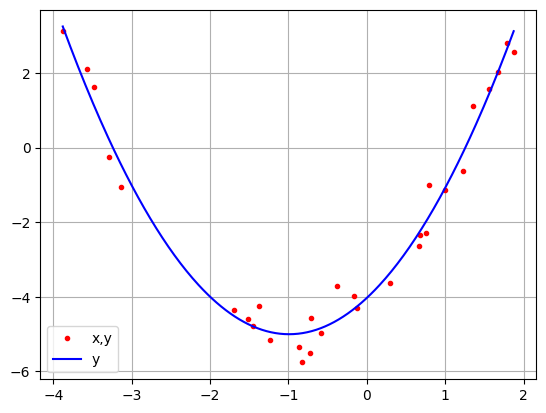

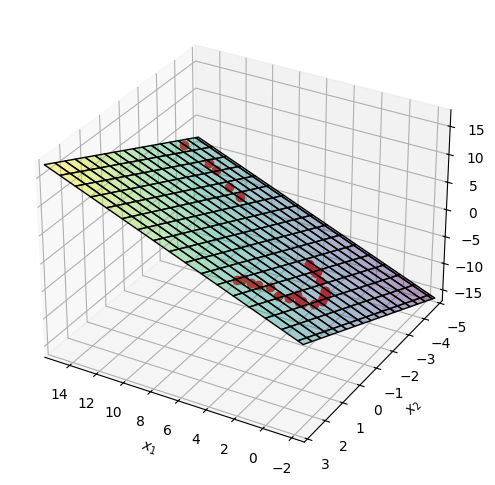

In [ ]:
# Teht. 2

#points x^(i),y^(i)
m=30 #number of points
A=1
B=2
C=-4
x0=-B/(2*A)
L=3
np.random.seed(0)

x=np.random.uniform(x0-L,x0+L,m) #uniformly from x0-L...x0+L
error=np.random.normal(0,0.4,m)
y=A*x**2+B*x+C+error

# matrix
X = np.column_stack((x**2, x, np.ones_like(x)))

# weights using normal equation
w = np.linalg.inv(X.T@X)@X.T@y

w1 = w[0]
w2 = w[1]
b = w[2]

print(f"w1 = {w1:.4}, w2 = {w2:.4}, b = {b:.4}")

x_fit = np.linspace(x.min(), x.max(), 300)
y_fit = w1 * x_fit**2 + w2 * x_fit + b

plt.plot(x, y, 'r.', label='x,y')
plt.plot(x_fit, y_fit, 'b-', label='y')
plt.grid()
plt.legend()
plt.show()


x1_range = np.linspace(15.5, -2.5, 50)
x2_range = np.linspace(3, -5, 50)
x1_plane, x2_plane = np.meshgrid(x1_range, x2_range)

y_plane = w1*x1_plane+w2*x2_plane+b

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

# Surface plot for the plane
ax.plot_surface(x1_plane, x2_plane, y_plane, rstride=3, cstride=3, cmap='viridis', edgecolor='black', alpha=0.4)
ax.set_xlim([15.5, -2.5])
ax.set_ylim([3, -5])

x1 = x**2
x2 = x
ax.plot3D(x1, x2, y, 'ro')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

plt.show()

w1: 0.9872851738355946, w2: 1.9607965289115648, b: -4.010642128607478


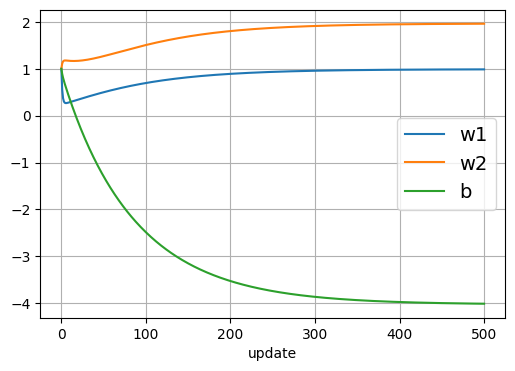

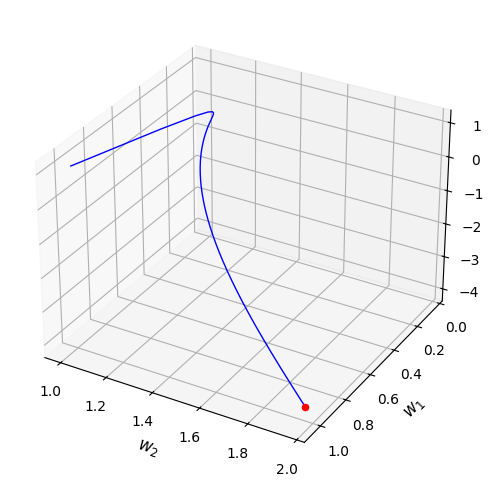

In [ ]:
# Teht 3

w1, w2, b = 1, 1, 1
alfa=0.01
N=500
W1=np.zeros(N+1)
W2=np.zeros(N+1)
B=np.zeros(N+1)

W1[0]=w1
W2[0]=w2
B[0]=b



for n in range(N):
    y_pred = w1*x1 + w2*x2 + b

    dw1 = (2 / m) * np.sum((y_pred - y) * x1)
    dw2 = (2 / m) * np.sum((y_pred - y) * x2)
    db = (2 / m) * np.sum(y_pred - y)

    w1 -= alfa * dw1
    w2 -= alfa * dw2
    b -= alfa * db

    W1[n+1]=w1
    W2[n+1]=w2
    B[n+1]=b


print(f"w1: {w1}, w2: {w2}, b: {b}")

#graphs of the coefficients
plt.figure(figsize=(6,4))
plt.plot(W1,label='w1')
plt.plot(W2,label='w2')
plt.plot(B,label='b')
plt.xlabel('update')
plt.legend()
plt.grid()
plt.show()


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(W2, W1, B, color='blue', linewidth=1)
ax.scatter(W2[-1], W1[-1], B[-1], color='red')
ax.set_ylim(1.1,0)

# Add labels
ax.set_xlabel('$w_2$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('$b$')

plt.show()

w1 = 17.837, w2 = -12.299, w3 = -3.443, w4 = -3.924, b = 1.803


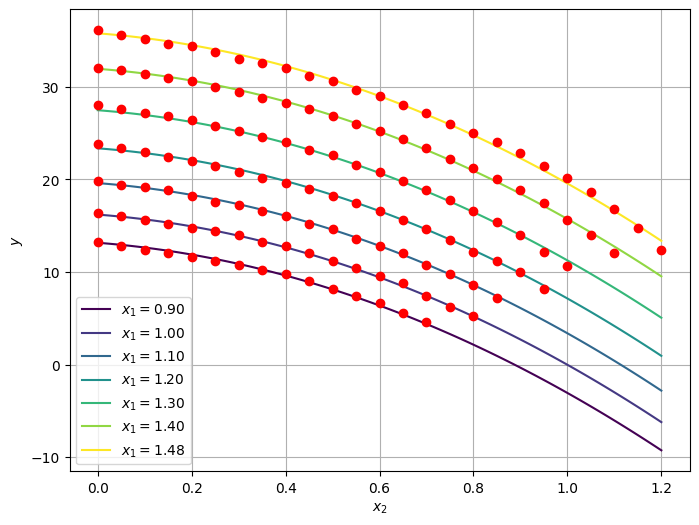

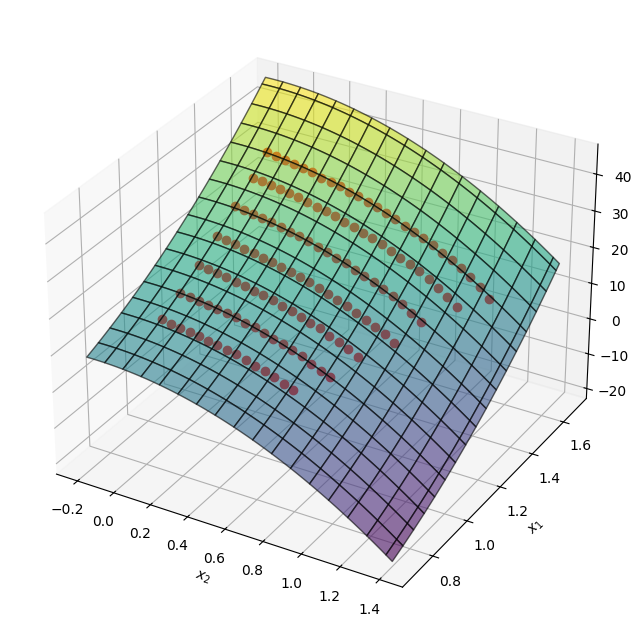

In [4]:
# Teht 4
import matplotlib.cm as cm

#read data into a matrix data
data=np.loadtxt('data_ex4.txt',delimiter=',')
#rows [x1^(i),x2^(i),y^(i)] = [RPM/1000,FLOW RATE/1000,TOTAL HEAD] (taken from the picture above)
data[:5,:]


x1 = data[:, 0]
x2 = data[:, 1]
y = data[:, 2]

# matrix
X = np.column_stack([x1**2, x2**2, x1, x2, np.ones_like(x1)])  # [(x1^2), (x2^2), x1, x2, 1]
w = np.linalg.inv(X.T @ X) @ X.T @ y # weights with normal equation
w1, w2, w3, w4, b = w

print(f"w1 = {w1:.3f}, w2 = {w2:.3f}, w3 = {w3:.3f}, w4 = {w4:.3f}, b = {b:.3f}")

# 2D plot:
plt.figure(figsize=(8, 6))
X2 = np.linspace(x2.min(), 1.2, 100)
u_x1 = np.unique(x1)
colors = cm.viridis(np.linspace(0, 1, len(u_x1)))

for i, val in enumerate(u_x1):
    data_point = (x1 == val)
    y_line = (w1 * val**2 + w2 * X2**2 + w3 * val + w4 * X2 + b)
    plt.plot(X2, y_line, '-', color=colors[i], label=f'$x_1 = {val:.2f}$')
    plt.plot(x2[data_point], y[data_point], 'ro')


plt.xlabel('$x_2$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()


# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x2_range = np.linspace(x2.min() - 0.2, x2.max() + 0.2, 50)
x1_range = np.linspace(x1.min() - 0.2, x1.max() + 0.2, 50)
x2_mesh, x1_mesh = np.meshgrid(x2_range, x1_range)
y_plane = (
    w1 * x1_mesh**2 + w2 * x2_mesh**2 +
    w3 * x1_mesh + w4 * x2_mesh + b
)

ax.plot_surface(x2_mesh, x1_mesh, y_plane, rstride=3, cstride=3, alpha=0.6, cmap='viridis', edgecolor='black')
ax.plot3D(x2, x1, y, 'ro')
ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$y$')
plt.show()

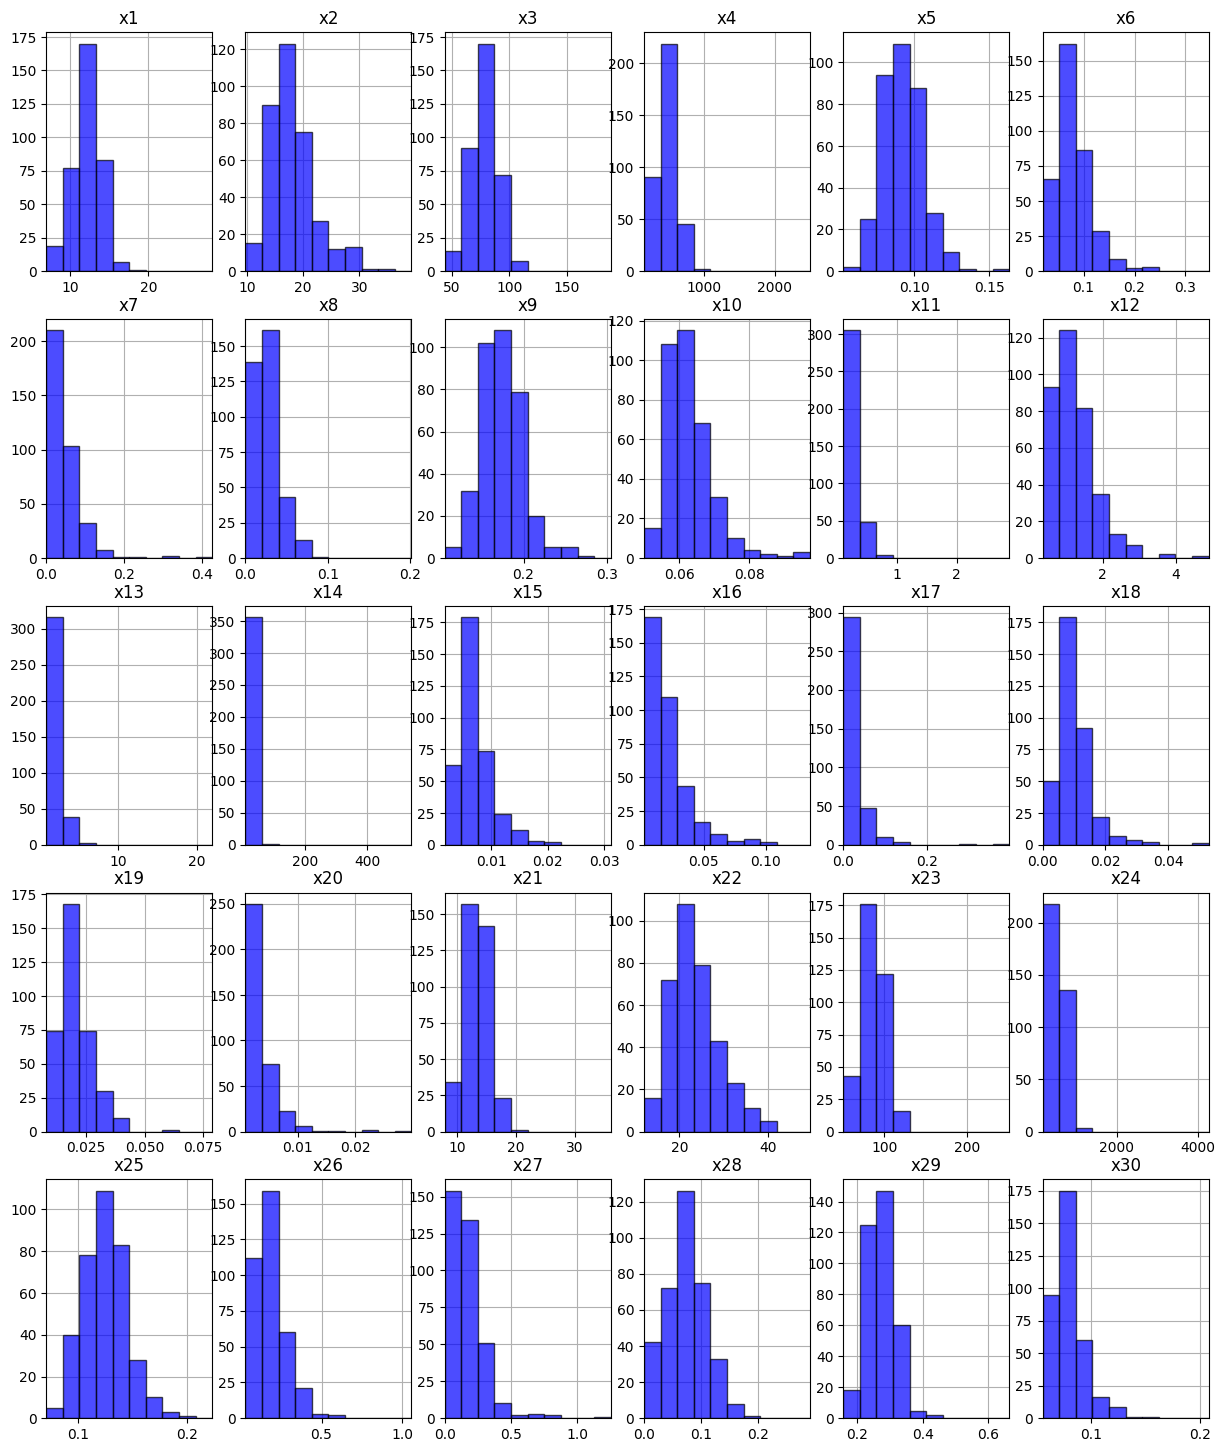

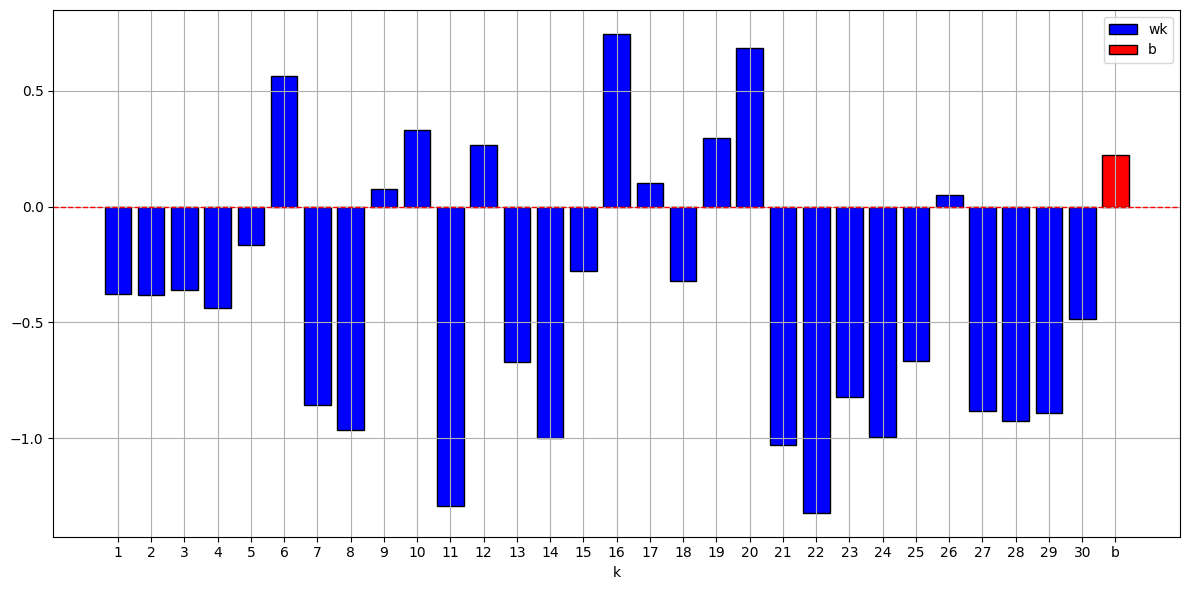

confusion Matrix:
[[207   5]
 [  2 355]]
Class y: 0


In [5]:
#-------------------------
#-- Logistic regression --
#-------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix

# Teht. 1 (5.)

# Load the dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
amount = X.shape[1]

plt.figure(figsize=(15, 18))
rows, cols = 5, 6

for k in range(amount):
    plt.subplot(rows, cols, k + 1)
    mk = np.min(X[:, k])
    Mk = np.max(X[:, k])
    binsk = np.linspace(mk, Mk, 11)  # 10 bins for each feature

    plt.hist(X[y == 1, k], binsk, edgecolor='k', color='b', alpha=0.7, label='y=1', zorder=2)
    plt.title(f'x{k + 1}')
    plt.grid(zorder=1)
    plt.xlim(mk, Mk)

plt.show()


#scaled coordinates, means = 0 and stds = 1
mu=np.mean(X,axis=0)
s=np.std(X,axis=0)
Xhat=(X-mu)/s

model = LogisticRegression(max_iter=10000, random_state=0)
model.fit(Xhat, y)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

plt.figure(figsize=(12, 6))
plt.bar(range(1, amount + 1), coefficients, color='b', edgecolor='k', label='wk')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.bar(amount + 1, intercept, color='r', edgecolor='k', label='b')
plt.xlabel('k')
plt.grid(True, zorder=1)
plt.xticks(list(range(1, amount + 2)), labels=list(range(1, amount + 1)) + ['b'])
plt.legend()
plt.tight_layout()
plt.show()


# confusion matrix
y_pred = model.predict(Xhat)
conf_matrix = confusion_matrix(y, y_pred)
print("confusion Matrix:")
print(conf_matrix)

x_point = np.array([13.61, 24.98, 88.05, 582.7, 0.09488, 0.08511, 0.08625, 0.04489, 0.1609, 0.05871,
                  0.4565, 1.29, 2.861, 43.14, 0.005872, 0.01488, 0.02647, 0.009921, 0.01465, 0.002355,
                  16.99, 35.27, 108.6, 906.5, 0.1265, 0.1943, 0.3169, 0.1184, 0.2651, 0.07397])
x_point_scaled = (x_point - mu) / s
y_pred = model.predict([x_point_scaled])[0]
print(f"Class y: {y_pred}")


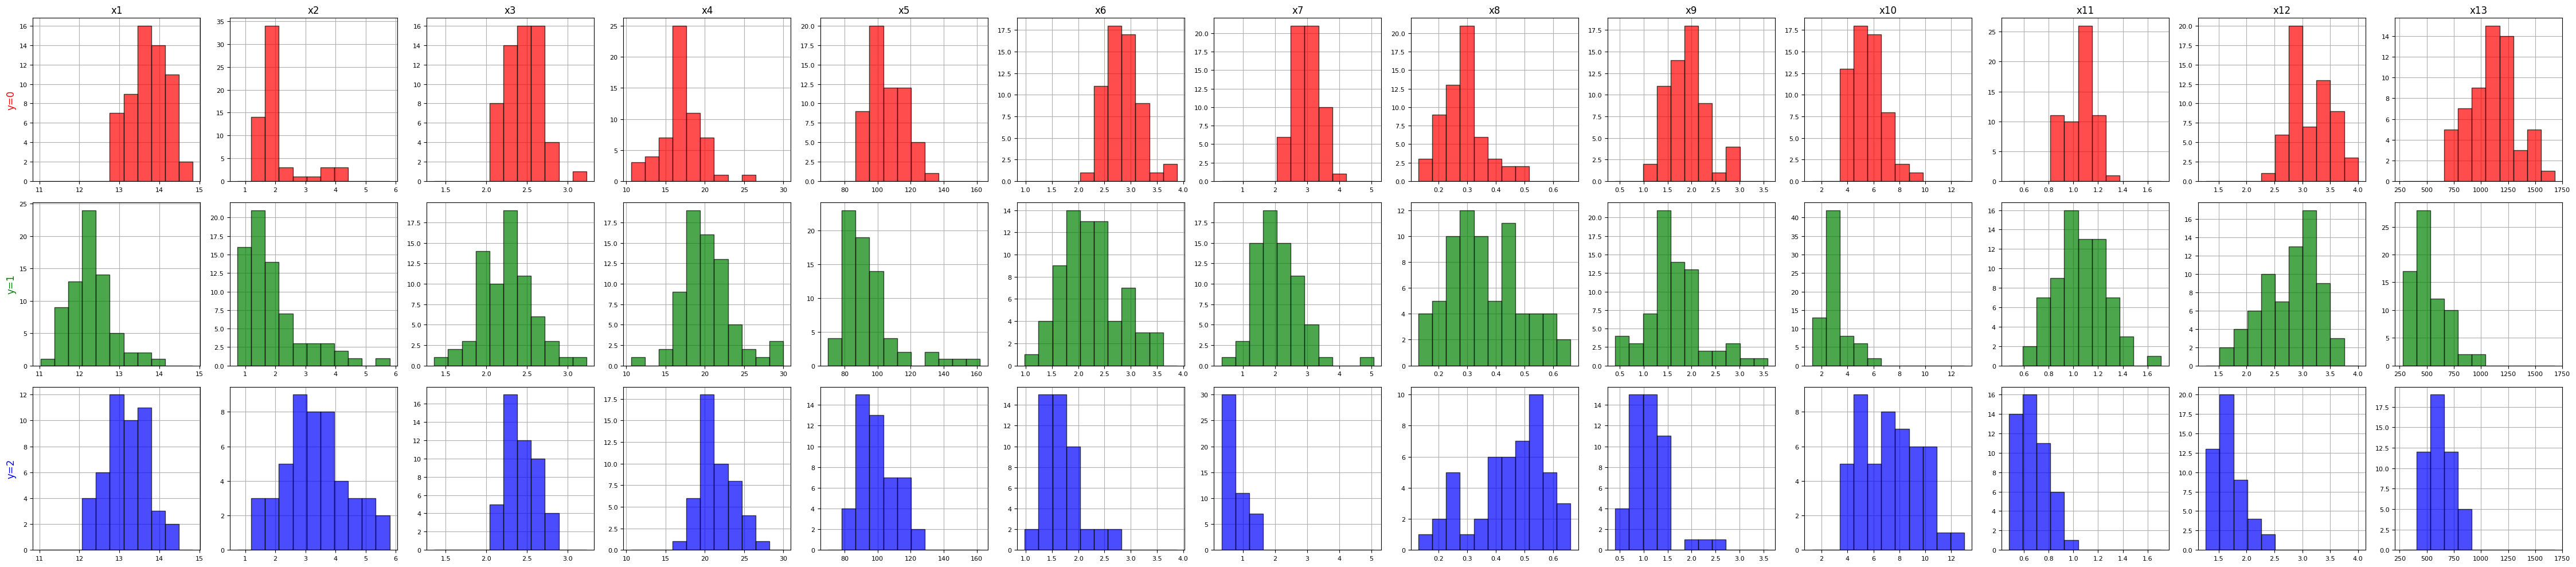

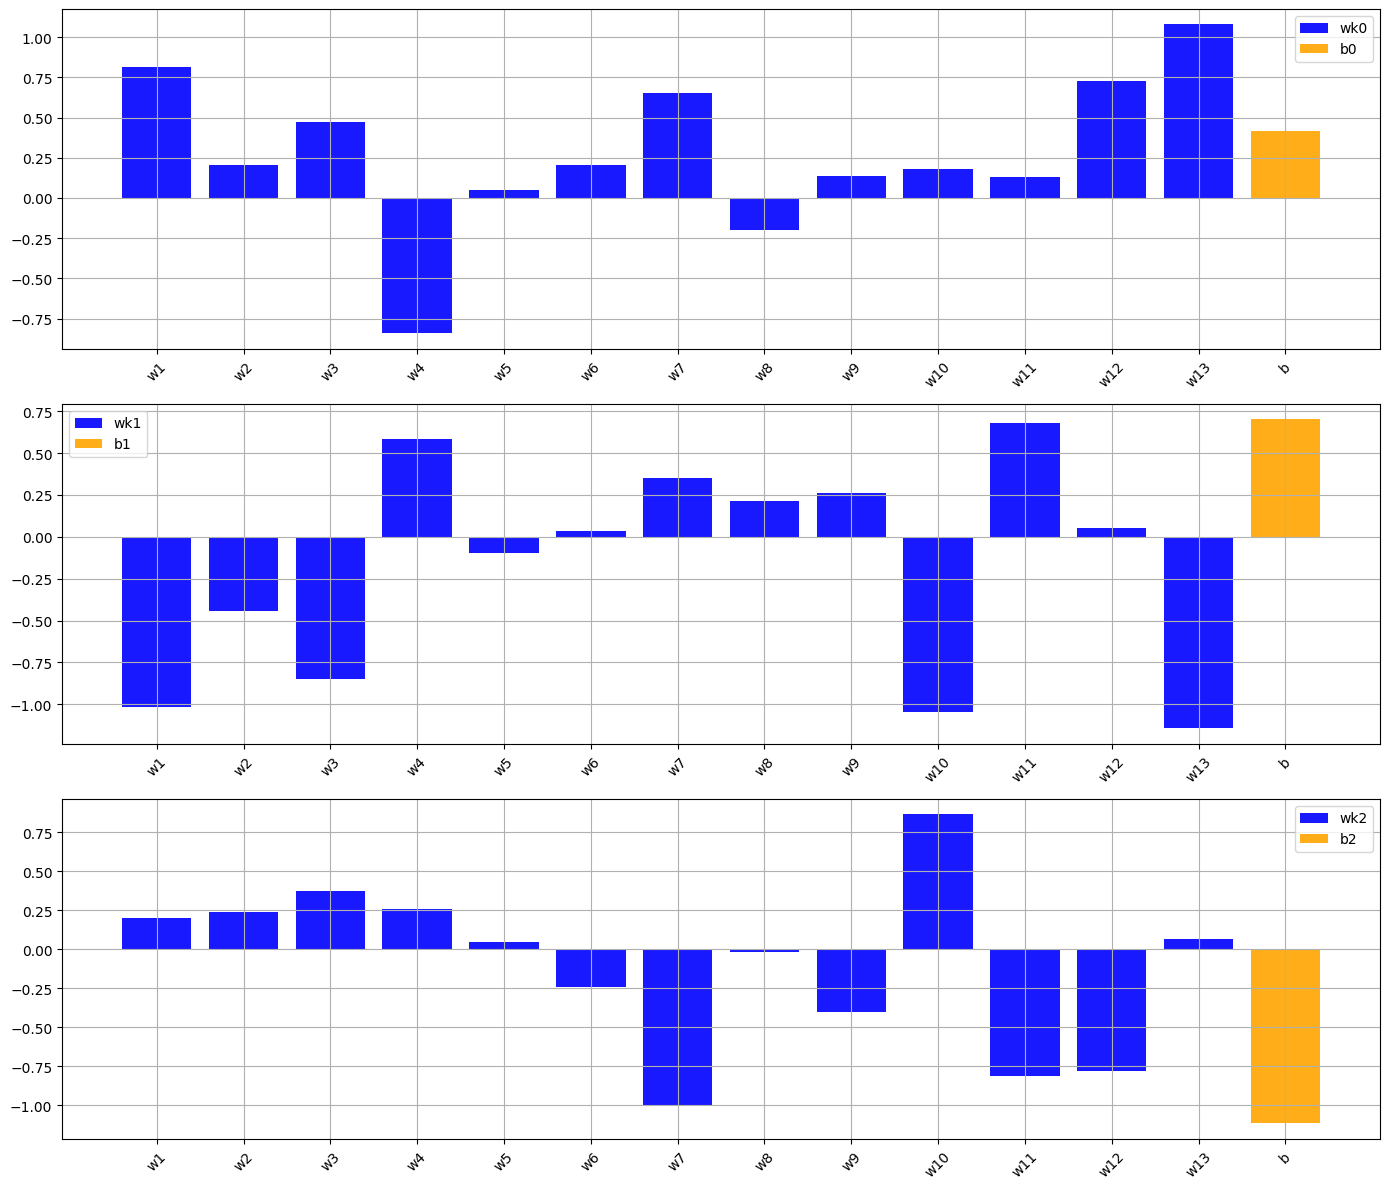

confusion matrix:
 [[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]
y = 1


In [6]:
# Teht 2. (6.)

# Load the dataset
X, y = datasets.load_wine(return_X_y=True)

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma

# plot 1
plt.figure(figsize=(45, 10))

colors = ['r', 'g', 'b']
labels = ['y=0', 'y=1', 'y=2']

for c, color, label in zip([0, 1, 2], colors, labels):
    for k in range(13):
        plt.subplot(3, 13, c * 13 + k + 1)
        bins = np.linspace(np.min(X[:, k]), np.max(X[:, k]), 12)
        plt.hist(X[y == c, k], bins, edgecolor='k', color=color, alpha=0.7, zorder=2)
        if c == 0:  # column titles for the first row
            plt.title(f'x{k + 1}')
        if k == 0:  # row labels for the first column
            plt.ylabel(label, color=color, fontsize=12)
        plt.grid()
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()



model = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=500)
model.fit(X_scaled, y)
w = model.coef_.T
b = model.intercept_

# plot 2
fig, axs = plt.subplots(3, 1, figsize=(14, 12))

for k in range(3):
    axs[k].bar(range(1, 14), w[:, k], color='b', alpha=0.9, label=f'wk{k}')
    axs[k].bar([14], b[k], color='orange', alpha=0.9, label=f'b{k}')  # b at index 14
    axs[k].set_xticks(range(1, 15))
    axs[k].set_xticklabels([f'w{i}' for i in range(1, 14)] + ['b'], rotation=45)
    axs[k].grid()
    axs[k].legend()

plt.tight_layout()
plt.show()

# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_scaled)
conf_matrix = confusion_matrix(y, y_pred)
print("confusion matrix:\n", conf_matrix)

# classify
x_point = np.array([13.0, 2.34, 2.36, 19.5, 99.7, 2.29, 2.03, 0.36, 1.59, 5.1, 0.96, 2.61, 746])
x_point_scaled = (x_point - mu) / sigma
y_pred = model.predict([x_point_scaled])[0]
print(f"y = {y_pred}")

w=[-1.9482241943918275,-0.011509482866381579,-1.1689418602896513,0.04348896053967241,0.08353331126692548, b=6.070686741096976]


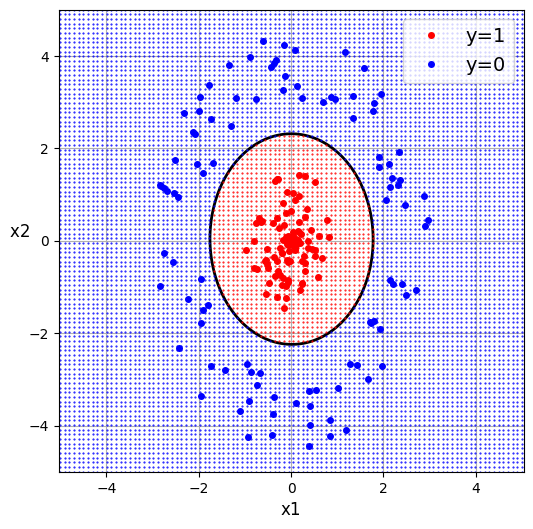

In [7]:
# Teht 3. (7.)

# points
np.random.seed(0)

r1 = np.random.rand(100)
th1 = 2 * np.pi * np.random.rand(100)
x1pun = r1 * np.cos(th1)
x2pun = 1.5 * r1 * np.sin(th1)

r2 = 2 + np.random.rand(100)
th2 = 2 * np.pi * np.random.rand(100)
x1sin = r2 * np.cos(th2)
x2sin = 1.5 * r2 * np.sin(th2)


X_inner = np.column_stack((x1pun, x2pun))
X_outer = np.column_stack((x1sin, x2sin))
X = np.vstack((X_inner, X_outer))
y = np.array([1] * 100 + [0] * 100)

X_transformed = np.column_stack([
    X[:, 0]**2,
    X[:, 0] * X[:, 1],
    X[:, 1]**2,
    X[:, 0],
    X[:, 1]
])

model = LogisticRegression()
model.fit(X_transformed, y)

w1, w2, w3, w4, w5 = model.coef_[0]
b = model.intercept_[0]

x1_range = np.linspace(-5, 5, 300)
x2_range = np.linspace(-5, 5, 300)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

z = (w1 * x1_grid**2 + w2 * x1_grid * x2_grid + w3 * x2_grid**2 + w4 * x1_grid + w5 * x2_grid + b)

print(f'w=[{w1},{w2},{w3},{w4},{w5}, b={b}]')

# NxN grid-points
N = 100
xx1 = np.linspace(-5, 5, N)
xx2 = np.linspace(-5, 5, N)
X1, X2 = np.meshgrid(xx1, xx2)  # x1x2-pairs, NxN-matrices
Z = (w1*X1**2+w2*X1*X2+w3*X2**2+w4*X1+w5*X2+b)
# Class 1 grid-points
X1pun = X1[Z>=0]
X2pun = X2[Z>=0]
# Class 0 grid-points
X1sin = X1[Z<0]
X2sin = X2[Z<0]


plt.figure(figsize=(6, 6))
plt.contour(x1_grid, x2_grid, z, levels=[0], colors='k', linewidths=2)
# grid-points
plt.plot(X1pun, X2pun, 'r.', markersize=1)
plt.plot(X1sin, X2sin, 'b.', markersize=1)
#data points
plt.plot(x1pun, x2pun, 'r.', markersize=8, label='y=1')
plt.plot(x1sin, x2sin, 'b.', markersize=8, label='y=0')
plt.grid()
plt.axis('equal')
plt.legend(fontsize=14)
plt.xlabel('x1',fontsize=12)
plt.ylabel('x2 ',rotation=0,fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2625 - loss: 1.3550 - val_accuracy: 0.4219 - val_loss: 1.1751
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3399 - loss: 1.1665 - val_accuracy: 0.5859 - val_loss: 1.0288
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6295 - loss: 0.9790 - val_accuracy: 0.8594 - val_loss: 0.6733
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8360 - loss: 0.5742 - val_accuracy: 0.9141 - val_loss: 0.2362
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9608 - loss: 0.2052 - val_accuracy: 0.8359 - val_loss: 0.3303
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1852 - val_accuracy: 0.9688 - val_loss: 0.1313
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9731 - loss: 0.1124 - val_accuracy: 0.9922 - val_loss: 0.0449
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0328 - val_accuracy: 0.9922 - val_loss:

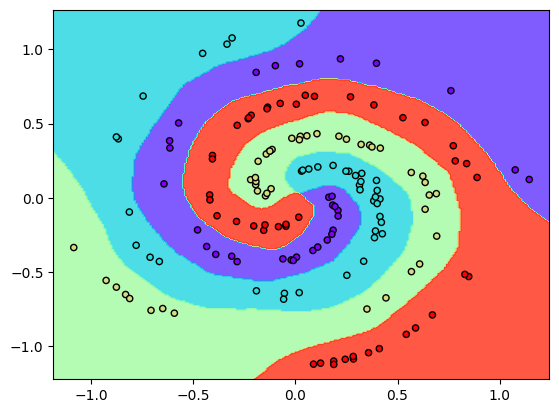

In [8]:
#-------------------------
#---- Neural Networks ----
#-------------------------

# Teht. 1. (8.)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate the dataset
np.random.seed(0)
n = 200
th = np.linspace(0, 2 * np.pi, n)
r = 0.15 + np.linspace(0, 1, n)
e = 0.02 * np.random.randn(n)

x11, x12 = r * np.cos(-th) + e, r * np.sin(-th) + e
x21, x22 = r * np.cos(np.pi/2 - th) + e, r * np.sin(np.pi/2 - th) + e
x31, x32 = r * np.cos(np.pi - th) + e, r * np.sin(np.pi - th) + e
x41, x42 = r * np.cos(3 * np.pi/2 - th) + e, r * np.sin(3 * np.pi/2 - th) + e

# Combine data
X = np.vstack((
    np.column_stack((x11, x12)),
    np.column_stack((x21, x22)),
    np.column_stack((x31, x32)),
    np.column_stack((x41, x42))
))
y = np.array([0]*n + [1]*n + [2]*n + [3]*n)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot decision boundaries
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.rainbow)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.rainbow)
    plt.show()

plot_decision_boundaries(X_test, y_test, model)
